**Week 1 Velocity distributions:**

Importing all external libraries used in this code

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import copy
import numpy as np
import scipy as scy

Creating a particle class:

In [2]:
class Particle:
    def __init__(self, r, x, y, vx, vy):
        self.r = r
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
    def __repr__(self):
        return str("This is a particle at %0.2f, %0.2f with v=%0.2f,%0.2f" % (self.x,self.y,self.vx,self.vy))

* Defining the box:

In [3]:
box_size_x = 20
box_size_y = 20

box = [box_size_x,box_size_y]

In [4]:
number_of_particles = 10
radius = 0.5

* Initialize velocities:

In [5]:
baseline_velocity = 0.5

vel = np.ones(number_of_particles) * baseline_velocity
angles = np.random.uniform(0,2 * np.pi, number_of_particles)


* Initialize position:

In [6]:
# random positions for particles

x_rand = np.random.randint(1,box[0]-1,number_of_particles)
y_rand = np.random.randint(1,box[1]-1,number_of_particles)


* Setting up the particle:

In [7]:
particles = []
for i in range(number_of_particles):
    particles.append(Particle(radius,x_rand[i],y_rand[i],np.sin(angles[i]) * vel[i],np.cos(angles[i]) * vel[i]))

* Defining simulation step numbers

In [8]:
steps = 50

* initialize trajectory:

In [9]:
data_traj = np.zeros((number_of_particles,4,steps))
data_traj.shape

(10, 4, 50)

* define time integrator for numerical, stepwise solution of equation of motion with a discrete time step $dt$:

In [10]:
def move(p,dt):
    p.x = p.x + p.vx * dt
    p.y = p.y + p.vy * dt
    return p

In [11]:
def move_unbound(p,dt):
    p.x = np.mod(p.x + p.vx * dt, box_size_x)
    p.y = np.mod(p.y + p.vy * dt, box_size_y)
    return p

* define box reflection:

In [12]:
def reflect(p):
    if (p.x + p.r) >= box[0]:
        p.vx = p.vx * (-1)
    if (p.x) <= p.r:
        p.vx = p.vx * (-1)
    if (p.y + p.r) >= box[1]:
        p.vy = p.vy * (-1)
    if (p.y) <= p.r:
        p.vy = p.vy * (-1)
    return p

In [13]:
# https://hermann-baum.de/elastischer_stoss/
def collide_simple(particles):
    for i in range(len(particles)):
        for j in range(len(particles)):
            if i < j:
                distance = np.sqrt(np.abs(particles[i].x-particles[j].x)**2+np.abs(particles[i].y-particles[j].y)**2)
                if distance<(particles[i].r+particles[j].r):
                    # angle between x-axis and line between particles
                    phi = np.arctan((particles[j].y - particles[i].y)/(particles[j].x - particles[i].x))
                    # change the velocities
                    particles[i].vx = ( particles[i].vx*np.sin(phi)-particles[i].vy*np.cos(phi))*np.sin(phi)+(particles[j].vx*np.cos(phi)+particles[j].vy*np.sin(phi))*np.cos(phi)
                    particles[i].vy = (-particles[i].vx*np.sin(phi)+particles[i].vy*np.cos(phi))*np.cos(phi)+(particles[j].vx*np.cos(phi)+particles[j].vy*np.sin(phi))*np.sin(phi)
                    particles[j].vx = ( particles[j].vx*np.sin(phi)-particles[j].vy*np.cos(phi))*np.sin(phi)+(particles[i].vx*np.cos(phi)+particles[i].vy*np.sin(phi))*np.cos(phi)
                    particles[j].vy = (-particles[j].vx*np.sin(phi)+particles[j].vy*np.cos(phi))*np.cos(phi)+(particles[i].vx*np.cos(phi)+particles[i].vy*np.sin(phi))*np.sin(phi)
                    #print(particles[i],particles[j],'collided with a distance of ', distance)


In [14]:
# check if particles are in border area

def border_control(particles, radius, box_size_x, box_size_y):
    # for i in range(len(particles)):
    #     for j in range(len(particles)):
            if particles.x < radius or particles.x > (box_size_x - radius):
                particles.x = np.mod(particles.x, box_size_x - radius)
            if particles.y < radius or particles.y > (box_size_y - radius):
                particles.y = np.mod(particles.y, box_size_y - radius)
  
particles[0].x = 9.6
particles[0].y = 5
particles[0].vx = 0.4
particles[0].vy = 0  
                
b = border_control(particles[0], 0.5, 10, 10)            

print(particles[0])

This is a particle at 0.10, 5.00 with v=0.40,0.00


In [15]:
# https://hermann-baum.de/elastischer_stoss/
def calculate_distance(particle_1, particle_2):
    distance = np.sqrt(np.abs(particle_1.x - particle_2.x)**2+np.abs(particle_1.y - particle_2.y)**2)
    return distance


def collide_boundary(particles,step):
    for i in range(len(particles)):
        for j in range(len(particles)):
            if i < j:
                distance = calculate_distance(particles[i],particles[j])
                #print(i,j)
                
                #distance = np.sqrt(np.abs(particles[i].x-particles[j].x)**2+np.abs(particles[i].y-particles[j].y)**2)
                
                if distance < (particles[i].r + particles[j].r):
                    print(step)
                    print(particles[i],particles[j],'collided with a distance of ', distance)
                    # angle between x-axis and line between particles
                    phi = np.arctan((particles[j].y - particles[i].y)/(particles[j].x - particles[i].x))

                    # move the particles out
                    distance_x = np.sign(particles[j].x-particles[i].x) * ((particles[i].r+particles[j].r)-distance) * np.cos(phi)
                    distance_y = np.sign(particles[j].y-particles[i].y) * ((particles[i].r+particles[j].r)-distance) * np.sin(phi)
                    print((particles[i].r+particles[j].r)-distance,phi,np.cos(phi),np.sin(phi))
                    print(distance_x,distance_y)
                    particles[i].x  = particles[i].x - (distance_x/2)
                    particles[i].y  = particles[i].y - (distance_y/2)
                    particles[j].x  = particles[j].x + (distance_x/2)
                    particles[j].y  = particles[j].y + (distance_y/2)

                    # change the velocities
                    particles[i].vx = ( particles[i].vx*np.sin(phi)-particles[i].vy*np.cos(phi))*np.sin(phi) + (particles[j].vx*np.cos(phi)+particles[j].vy*np.sin(phi))*np.cos(phi)
                    particles[i].vy = (-particles[i].vx*np.sin(phi)+particles[i].vy*np.cos(phi))*np.cos(phi) + (particles[j].vx*np.cos(phi)+particles[j].vy*np.sin(phi))*np.sin(phi)
                    particles[j].vx = ( particles[j].vx*np.sin(phi)-particles[j].vy*np.cos(phi))*np.sin(phi) + (particles[i].vx*np.cos(phi)+particles[i].vy*np.sin(phi))*np.cos(phi)
                    particles[j].vy = (-particles[j].vx*np.sin(phi)+particles[j].vy*np.cos(phi))*np.cos(phi) + (particles[i].vx*np.cos(phi)+particles[i].vy*np.sin(phi))*np.sin(phi)
                    distance = np.sqrt(np.abs(particles[i].x-particles[j].x)**2+np.abs(particles[i].y-particles[j].y)**2)
                    print(particles[i],particles[j],'collided with a distance of ', distance)
                    

In [16]:
# particles[0].x = 5
# particles[0].y = 10
# particles[0].vx = 0.4
# particles[0].vy = 0
# 
# particles[1].x = 15
# particles[1].y = 10
# particles[1].vx = -0.4
# particles[1].vy = 0
# 
# particles[2].x = 10
# particles[2].y = 14.5
# particles[2].vx = 0
# particles[2].vy = -0.4
# 
# print(particles)

* carry out simulation:

In [17]:

for i in range(steps):
    for j in range(number_of_particles):
        #move(p1,1)
        #reflect(p1)
        move_unbound(particles[j],1)
    collide_boundary(particles,i)
    for j in range(number_of_particles):
        data_traj[j,:,i] = [particles[j].x, particles[j].y, particles[j].vx, particles[j].vy]
        

5
This is a particle at 3.92, 8.69 with v=0.49,0.11 This is a particle at 4.19, 8.06 with v=-0.47,0.18 collided with a distance of  0.6845254086676611
0.3154745913323389 -1.159480539604315 0.3998157184117938 -0.9165955440164769
0.12613170037420615 0.2891626046656409
This is a particle at 3.86, 8.54 with v=0.31,0.45 This is a particle at 4.26, 8.21 with v=-0.44,0.13 collided with a distance of  0.5237169350108627
6
This is a particle at 4.17, 9.00 with v=0.31,0.45 This is a particle at 3.81, 8.34 with v=-0.44,0.13 collided with a distance of  0.7490470735128543
0.25095292648714573 1.0759671767579517 0.474881301717099 0.8800498561328634
-0.11917285239993122 -0.22085108685113364
This is a particle at 4.23, 9.11 with v=0.01,0.02 This is a particle at 3.75, 8.23 with v=-0.39,0.21 collided with a distance of  1.0000000000000002
7
This is a particle at 14.99, 8.80 with v=0.50,-0.03 This is a particle at 14.48, 8.11 with v=-0.31,0.39 collided with a distance of  0.8586919780422925
0.1413080219

In [18]:
#data_traj

* Plotting trajectory with Matplotlib:

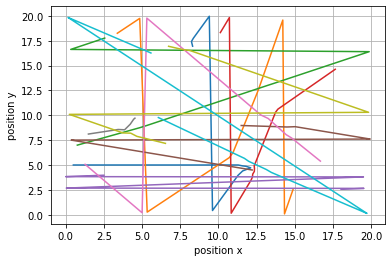

In [19]:
for data_traj_j in data_traj:
    plt.plot(data_traj_j[0],data_traj_j[1],'-')
plt.xlabel('position x')
plt.ylabel('position y')

plt.grid()
plt.show()

**Animate trajectory:**

* Set up the figure, the axis, and the plot element we want to animate

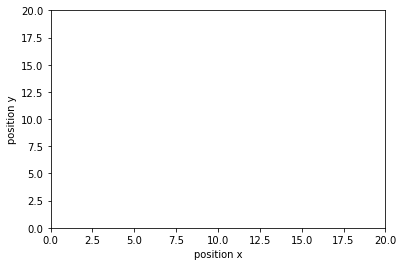

In [20]:
fig, ax = plt.subplots()

ax.set_xlim((0, box[0]))
ax.set_ylim((0, box[1]))

plt.xlabel('position x')
plt.ylabel('position y')

# make the points in the plot the correct size according to the radius of the particles
# use ax.transData.transform to convert radius size from particle to markerSize from pyplot
desired_size_in_data_units = radius
data_to_points = ax.transData.transform((desired_size_in_data_units, 0)) - ax.transData.transform((0, 0))
marker_size_in_points = data_to_points[0]


dot, = ax.plot([], [], 'bo', ms=marker_size_in_points)


#ax.plot(5,5, 'bo', ms=marker_size_in_points)
# dont show the plot 
#plt.close()

* initialization function: plot the background of each frame

In [21]:
def init():
    dot.set_data([], [])
    return (dot,)

In [22]:
data_traj[:,0,1]

array([ 0.9       , 14.77778892,  2.10953347, 17.31668197,  2.0016619 ,
       11.99874576, 16.37099925,  1.97334717,  6.06457517,  5.16485636])

* animation function. This is called sequentially

In [23]:
def animate(i):
    x = data_traj[:,0,i]
    y = data_traj[:,1,i]
    dot.set_data(x, y)
    return (dot,)


* call the animator. blit=True means only re-draw the parts that have changed.

In [24]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=steps, interval=60, blit=True)

In [25]:
HTML(anim.to_html5_video())
anim.save('animation.mp4', writer='ffmpeg', fps=30)


**Histogramming:**

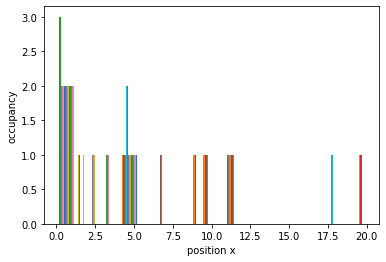

In [26]:
plt.hist(data_traj[0],range=(0,box[0]),bins=10)
plt.xlabel('position x')
plt.ylabel('occupancy')
plt.show()

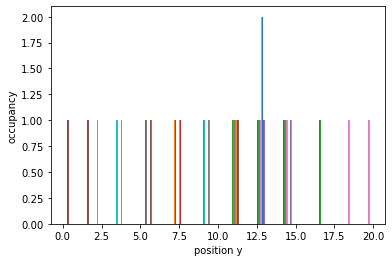

In [27]:
plt.hist(data_traj[1],range=(0,box[1]),bins=10)
plt.xlabel('position y')
plt.ylabel('occupancy')
plt.show()

ValueError: too many values to unpack (expected 2)

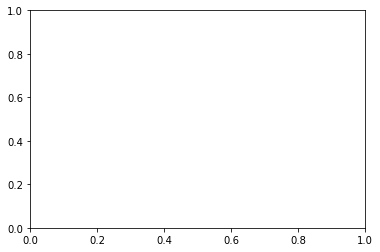

In [28]:
plt.hist2d(data_traj[0], data_traj[1], range=[[0,box[0]],[0,box[1]]], bins=10)
plt.xlabel('position x')
plt.ylabel('position y')
plt.colorbar().set_label('occupancy')
plt.show()

**Interpretation:**
* in the reduced data projection, the occupancy of each bin seems even and well-distributed
* in the full dimensional projection, it can be seen easily that the box is **not** fully sampled, large undersampled patches present
* *data dimensionality reduction always brings the danger of wrong projection!*

**Solution for improvements:**
* enhance sampling by
    * prolong the simulation
    * increase the time step
* *Caveat: all solutions come with problems like increased computational cost or sampling errors!*